In [333]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#lire fichier a
data = pd.read_csv('company.csv')

#Trete done yo

#Retire tou K yo epi ranplse yo pa 000
data['salary'] = data['salary'].astype(str).str.replace('K', '000')

#Retire tout , yo epi konveti tut en float
data['salary'] = data['salary'].astype(str).str.replace(',', '').astype(float)


#pou kolon years_at_company ranplase years yo
data['years_at_company']=data['years_at_company'].astype(str).str.replace(' years', '')

#Pou kolon gender a, metel ak yon sel let
data['gender']=data['gender'].replace({'Male':'M','Female':'F'})

#Pou date la
data['hired_date'] = pd.to_datetime(data['hired_date'], format='mixed', dayfirst=True)

#Ranplase NaN yo pa 0
data['salary']=data['salary'].fillna(0)

#pou kolon education_level ranplase NaN par Aucun
data['education_level'].fillna('Aucun', inplace=True)
data 

,employee_id,department,salary,years_at_company,age,job_satisfaction,performance_score,last_promotion_year,education_level,gender,hired_date
0,1,Sales,60000.0,5,30,7,85,2018,Bachelor,M,2015-06-15
1,2,Engineering,95.0,8,35,8,90,2017,Master,F,2012-09-01
2,3,HR,45000.0,2,28,6,70,2020,Bachelor,F,2019-04-23
3,4,Marketing,75000.0,10,40,9,95,2015,Master,M,2010-02-10
4,5,IT,50000.0,3,25,5,60,2011,Bachelor,M,2018-07-18
5,6,Engineering,85000.0,6,33,7,88,2019,Master,M,2016-10-03
6,7,Marketing,70.0,7,38,8,92,2016,Bachelor,F,2013-05-14
7,8,Sales,55.0,4,29,6,75,2021,Bachelor,M,2018-06-22
8,9,IT,48.0,2,26,5,62,2022,Master,F,2019-11-07
9,10,HR,40000.0,1,24,4,68,2023,Bachelor,F,2020-08-30


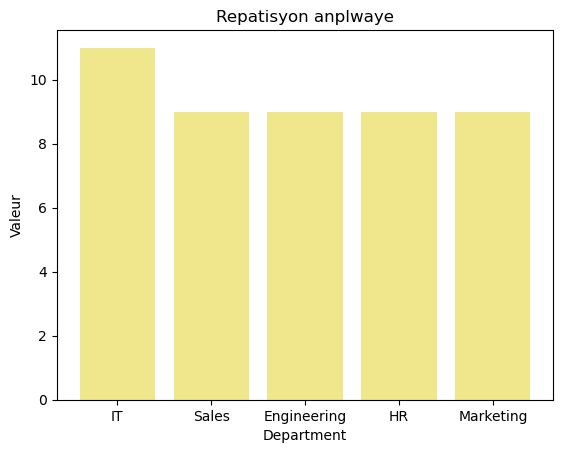

department
IT             11
Sales           9
Engineering     9
HR              9
Marketing       9
Name: count, dtype: int64


In [334]:
#1 Repatisyon chak anplwaye nan chak depatman.
department_distribution = data['department'].value_counts()
plt.bar(department_distribution.index, department_distribution, color='khaki')
plt.xlabel('Department')
plt.ylabel('Valeur')
plt.title('Repatisyon anplwaye')

# Afficher bar
plt.show()

print(department_distribution)

In [335]:
# 2. Repatisyon pa seks chak depatman
genre_distribution = data.groupby(['department', 'gender']).size().unstack(fill_value=0)
print("Repatisyon pa seks chak depatman:\n", genre_distribution)

Repatisyon pa seks chak depatman:
 gender       F  M
department       
Engineering  3  6
HR           8  1
IT           4  7
Marketing    4  5
Sales        2  7


In [336]:
# 3 Moyenne depatman
moyenne_age = data.groupby('department')['age'].mean()
print("Mwayen l'aj anplwaye pa depatman:\n", moyenne_age)

Mwayen l'aj anplwaye pa depatman:
 department
Engineering    32.777778
HR             25.444444
IT             26.090909
Marketing      38.000000
Sales          29.444444
Name: age, dtype: float64


In [337]:
# 4. Mwayen sale pa depatman
moyenne_salaire = data.groupby('department')['salary'].mean()
print("Mwayen sale pa depatman:\n", moyenne_salaire)

Mwayen sale pa depatman:
 department
Engineering    39241.666667
HR             56444.444444
IT             45463.636364
Marketing      60118.888889
Sales          51895.000000
Name: salary, dtype: float64


In [338]:
#5 Satisfaction Job
satisfaction = data.groupby('department')['job_satisfaction'].mean()
satisfaction

department
Engineering    7.222222
HR             4.777778
IT             5.090909
Marketing      8.222222
Sales          6.222222
Name: job_satisfaction, dtype: float64

In [339]:
# 6. Mwayèn tan ki genyen depi dènye fwa konpayi a te bay yon pwomosyon nan chak depatman
data['years_since_last_promotion'] = 2024 - data['last_promotion_year']

# Mwayen ane resan 
min_annee = data.groupby('department')['years_since_last_promotion'].min()

# mwayen vale minimal yo
moyenne_min_annee = min_annee.mean()
data
print("Mwayèn tan ki genyen depi dènye fwa konpayi a te bay yon pwomosyon nan chak depatman se :", moyenne_min_annee)


Mwayèn tan ki genyen depi dènye fwa konpayi a te bay yon pwomosyon nan chak depatman se : 1.8


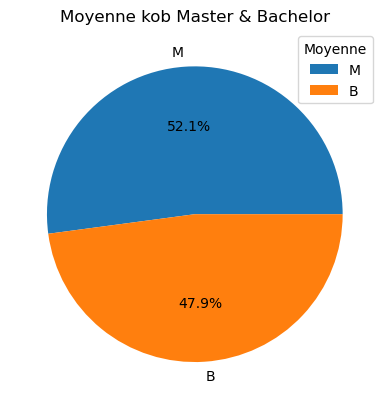

education_level
Bachelor    51487.08
Master      47311.15
Name: salary, dtype: float64


In [344]:
# Mwayen sale Master & Bachelor

co=data[data['education_level'] !='Aucun']
moyenne_salaire_education_level = co.groupby('education_level')['salary'].mean()
plt.pie(moyenne_salaire_education_level, autopct='%1.1f%%', labels='MB')
plt.legend(title="Moyenne")
plt.title('Moyenne kob Master & Bachelor')
plt.show()

print(moyenne_salaire_education_level)
